In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: CK+48/anger/S010_004_00000017.png  
  inflating: CK+48/anger/S010_004_00000018.png  
  inflating: CK+48/anger/S010_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000020.png  
  inflating: CK+48/anger/S011_004_00000021.png  
  inflating: CK+48/anger/S014_003_00000028.png  
  inflating: CK+48/anger/S014_003_00000029.png  
  inflating: CK+48/anger/S014_003_00000030.png  
  inflating: CK+48/anger/S022_005_00000030.png  
  inflating: CK+48/anger/S022_005_00000031.png  
  inflating: CK+48/anger/S022_005_00000032.png  
  inflating: CK+48/anger/S026_003_00000013.png  
  inflating: CK+48/anger/S026_003_00000014.png  
  inflating: CK+48/anger/S026_003_00000015.png  
  inflating: CK+48/anger/S028_001_00000022.png  
  inflating: CK+48/anger/S028_001_00000023.png  
  inflating: CK+48/anger/S028_001_00000024.png  
  inflating: CK+48/anger/S029_001_00000017.png  
  inflating: CK+48/anger/S029_001_00000018.png 

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


dataset_dir = '/content/CK+48'


img_size = (128, 128)
input_shape = img_size + (3,)


batch_size = 32
epochs = 100
learning_rate = 0.001

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 788 images belonging to 7 classes.
Found 193 images belonging to 7 classes.


In [ ]:
import os
import shutil
import random

# Directory where the CK+ data is stored (organized by emotion categories)
source_dir = '/content/CK+48'
target_dir = '/content/dataset'

# Split ratios
train_split = 0.7
val_split = 0.15
test_split = 0.15

# Create the directory structure for train, validation, and test sets
for split in ['train', 'val', 'test']:
    for category in os.listdir(source_dir):
        os.makedirs(os.path.join(target_dir, split, category), exist_ok=True)

# Split data for each category
for category in os.listdir(source_dir):
    category_path = os.path.join(source_dir, category)
    images = os.listdir(category_path)

    random.shuffle(images)

    train_count = int(len(images) * train_split)
    val_count = int(len(images) * val_split)

    train_images = images[:train_count]
    val_images = images[train_count:train_count + val_count]
    test_images = images[train_count + val_count:]

    # Copy images to their respective directories
    for image in train_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(target_dir, 'train', category, image))

    for image in val_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(target_dir, 'val', category, image))

    for image in test_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(target_dir, 'test', category, image))

print("Dataset split complete.")


Dataset split complete.


Found 682 images belonging to 7 classes.
Found 145 images belonging to 7 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.3464 - loss: 1.9109 - val_accuracy: 0.6483 - val_loss: 1.0702
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.6495 - loss: 1.0398 - val_accuracy: 0.6690 - val_loss: 1.0271
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7298 - loss: 0.8482 - val_accuracy: 0.7586 - val_loss: 0.7112
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7633 - loss: 0.6653 - val_accuracy: 0.6759 - val_loss: 0.8929
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.7959 - loss: 0.5992 - val_accuracy: 0.6414 - val_loss: 0.8819
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8230 - loss: 0.5470 - val_accuracy: 0.7724 - val_loss: 0.6680
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8052 - loss: 0.5478 - val_accuracy: 0.8207 - val_loss: 0.6238
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8615 - loss: 0.4616 - val_accuracy: 0.8069 - val_loss: 0.6

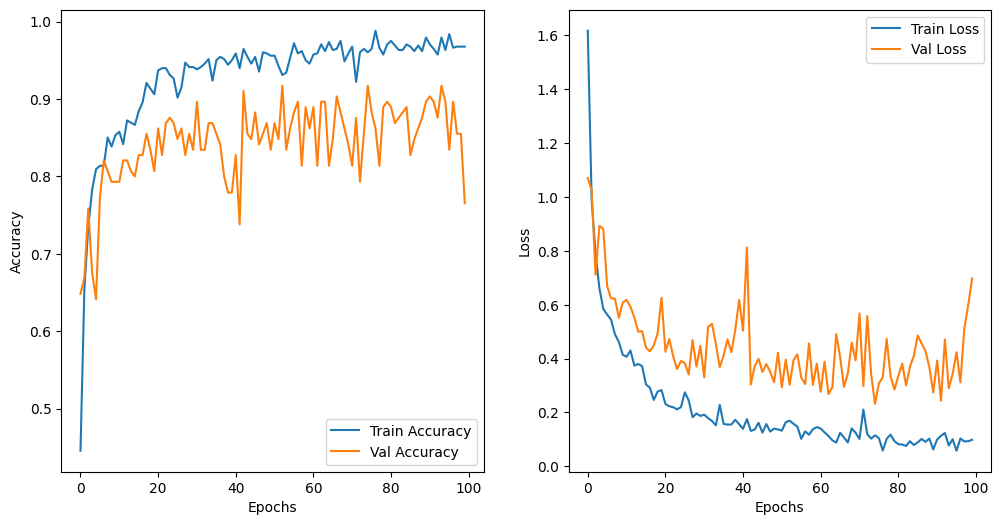

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 100
NUM_CLASSES = 7  # Assuming 7 emotion classes from CK+

# Load the base MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/dataset/train', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_generator = val_datagen.flow_from_directory('/content/dataset/val', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

history=model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

test_generator = val_datagen.flow_from_directory('/content/dataset/test', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=1)
y_true = test_generator.classes
print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 100
NUM_CLASSES = 7

# Load the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/dataset/train', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_generator = val_datagen.flow_from_directory('/content/dataset/test', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

# Train the model
history=model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

# Evaluate the model
test_generator = val_datagen.flow_from_directory('/content/dataset/test', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_loss, test_acc = model.evaluate(test_generator)
print(f'InceptionV3 Test Accuracy: {test_acc}')

# Confusion matrix and classification report
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=1)
y_true = test_generator.classes
print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))

























Found 682 images belonging to 7 classes.
Found 154 images belonging to 7 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 127s 5s/step - accuracy: 0.2803 - loss: 2.3445 - val_accuracy: 0.5260 - val_loss: 1.4473
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 116s 5s/step - accuracy: 0.4710 - loss: 1.4587 - val_accuracy: 0.5584 - val_loss: 1.2790
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.5008 - loss: 1.3512 - val_accuracy: 0.6429 - val_loss: 1.1380
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 117s 5s/step - accuracy: 0.5828 - loss: 1.1691 - val_accuracy: 0.6104 - val_loss: 1.0904
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.6233 - loss: 1.0516 - val_accuracy: 0.6494 - val_loss: 1.0795
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.6433 - loss: 0.9904 - val_accuracy: 0.6753 - val_loss: 0.9355
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.6926 - loss: 0.9152 - val_accuracy: 0.6883 - val_loss: 0.9590
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 145s 5s/step - accuracy: 0.7282 - loss: 0.8288 - val_accuracy: 0.7208 - val_l

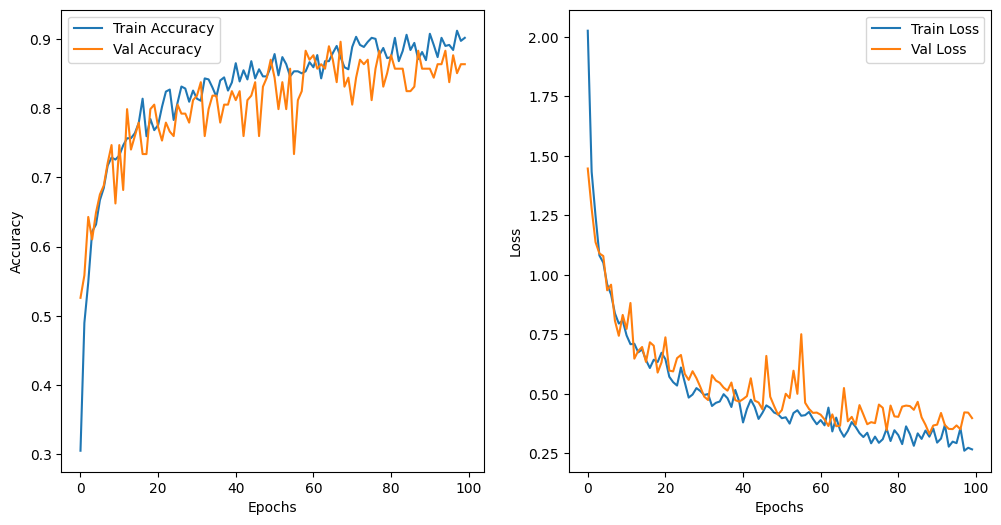

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

    # Loss Curves
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 100
NUM_CLASSES = 7

# Load the Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/dataset/train', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_generator = val_datagen.flow_from_directory('/content/dataset/test', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

# Train the model
history=model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

# Evaluate the model
test_generator = val_datagen.flow_from_directory('/content/dataset/test', target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_loss, test_acc = model.evaluate(test_generator)
print(f'XceptionV3 Test Accuracy: {test_acc}')

# Confusion matrix and classification report
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=1)
y_true = test_generator.classes
print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

    # Loss Curves
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 682 images belonging to 7 classes.
Found 154 images belonging to 7 classes.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 191s 8s/step - accuracy: 0.3176 - loss: 1.8121 - val_accuracy: 0.5779 - val_loss: 1.2282
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 183s 8s/step - accuracy: 0.5620 - loss: 1.3066 - val_accuracy: 0.6104 - val_loss: 1.1125
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 180s 8s/step - accuracy: 0.6141 - loss: 1.0813 - val_accuracy: 0.6234 - val_loss: 1.0118
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 203s 8s/step - accuracy: 0.6587 - loss: 0.9156 - val_accuracy: 0.6688 - val_loss: 0.9736
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 187s 8s/step - accuracy: 0.6615 - loss: 0.9718 - val_accuracy: 0.6429 - val_loss: 0.9593
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 179s 8s/step - accuracy: 0.7119 - loss: 0.8834 - val_accuracy: 0.6688 - val_loss: 0.8594
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 205s 8s/step - accuracy: 0.7166 - loss: 0.7841 - val_accuracy: 0.6688 - val_loss: 0.8836
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 183s 8s/step - accuracy: 0.7484 - loss: 0.7415 - val_accuracy: 0.6494 - val_l

NameError: name 'plt' is not defined

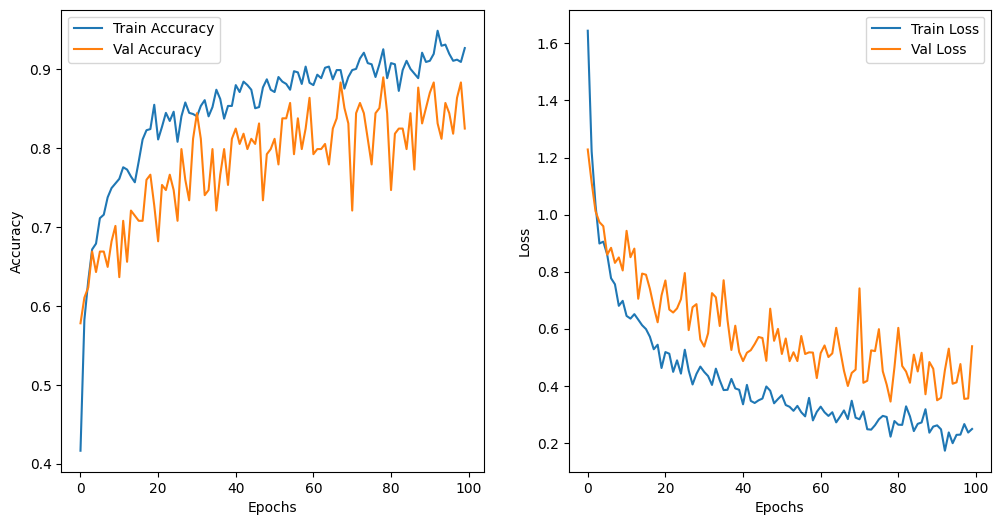

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

    # Loss Curves
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()